In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr, spearmanr, chi2_contingency, f_oneway
from statsmodels.tsa.seasonal import seasonal_decompose

#### Drill Down Analysis

In [4]:
# Sample dataset
data = {
    'Region': ['North', 'South', 'North', 'West', 'East', 'South', 'West', 'East'],
    'Sales': [5000, 7000, 4500, 6200, 5200, 8000, 6100, 5300],
    'Product': ['A', 'B', 'A', 'C', 'C', 'B', 'A', 'C']
}


In [5]:
df = pd.DataFrame(data)
df.head()

,Region,Sales,Product
0,North,5000,A
1,South,7000,B
2,North,4500,A
3,West,6200,C
4,East,5200,C


In [6]:
# Drill Down sales by region
sales_by_region = df.groupby('Region')['Sales'].sum()
print(sales_by_region)

Region
East     10500
North     9500
South    15000
West     12300
Name: Sales, dtype: int64


#### Correlation & Causation

In [8]:
np.random.seed(42)
df = pd.DataFrame({
    'Ad_Spend': np.random.randint(1000, 5000, 20),
    'Sales': np.random.randint(5000, 25000, 20)
})

# calculate pearson correlation
correlation, p_value = pearsonr(df['Ad_Spend'], df['Sales'])
print(f"Correlation: {correlation:.2f}")
if p_value < 0.05:
    print("The correlation is statistically significant.")
else:
    print("No significant correlation found.")

Correlation: 0.02
No significant correlation found.


#### Outlier Detection

In [9]:
from scipy.stats import zscore

df['Sales_ZScore'] = zscore(df['Sales'])

# Identifying outliers (Z-Score > 3 or < -3)
outliers = df[df['Sales_ZScore'].abs() > 3]
print(outliers)

Empty DataFrame
Columns: [Ad_Spend, Sales, Sales_ZScore]
Index: []


#### Regression Analysis

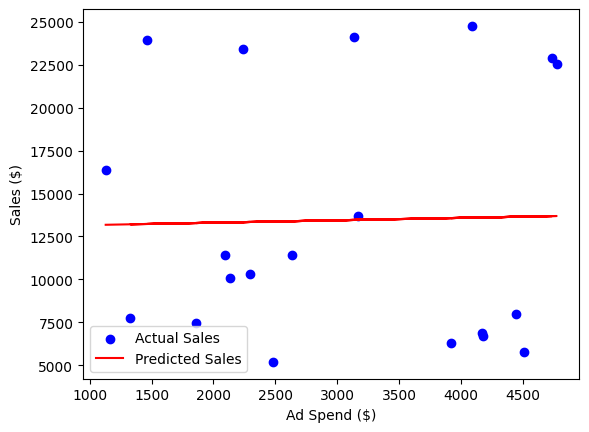

In [10]:
from sklearn.linear_model import LinearRegression

X = df[['Ad_Spend']]
y = df['Sales']

model = LinearRegression()
model.fit(X, y)

# Predicting sales
df['Predicted_Sales'] = model.predict(X)

# Visualizing
plt.scatter(df['Ad_Spend'], df['Sales'], color='blue', label='Actual Sales')
plt.plot(df['Ad_Spend'], df['Predicted_Sales'], color='red', label='Predicted Sales')
plt.xlabel('Ad Spend ($)')
plt.ylabel('Sales ($)')
plt.legend()
plt.show()

#### Time-Series Analysis

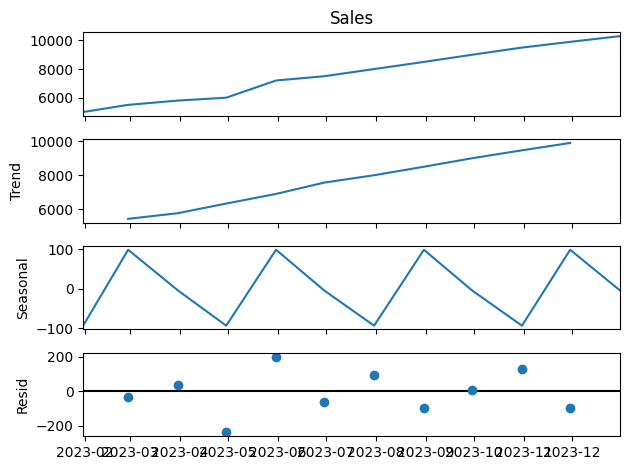

In [11]:
# Creating dummy time-series data
date_rng = pd.date_range(start='2023-01-01', periods=12, freq='M')
sales_data = np.array([5000, 5500, 5800, 6000, 7200, 7500, 8000, 8500, 9000, 9500, 9900, 10300])
df = pd.DataFrame({'Date': date_rng, 'Sales': sales_data})
df.set_index('Date', inplace=True)

# Decomposing the time series
decomposed = seasonal_decompose(df['Sales'], model='additive', period=3)

# Plotting components
decomposed.plot()
plt.show()

#### Hypothesis Testing

In [12]:
# Sample sales data from different campaigns
campaign_A = [100, 120, 130, 110, 115]
campaign_B = [90, 105, 102, 95, 100]
campaign_C = [130, 140, 135, 128, 132]

# ANOVA test
f_stat, p_value = f_oneway(campaign_A, campaign_B, campaign_C)
print(f"F-Statistic: {f_stat:.2f}, P-Value: {p_value:.4f}")

if p_value < 0.05:
    print("There is a significant difference in campaign performances.")
else:
    print("No significant difference between campaigns.")


F-Statistic: 24.64, P-Value: 0.0001
There is a significant difference in campaign performances.
